In [1]:
# Mount Google drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [ ]:
def plotveccomp(x, name = ' ', axis = None, linewidth = 1, color = 'black', marker = ''):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, linewidth = linewidth, color = color, marker = marker) 
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue') 
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  #ax.set_xlabel('')
  #ax.set_ylabel('')
  ax.set_title(name)

In [ ]:
# Load library for ECG data
from scipy.misc import electrocardiogram

In [ ]:
x = electrocardiogram()
x = x[0:256]

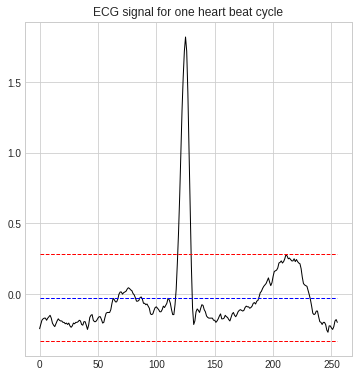

In [ ]:
# Plot ECG signal for one heart beat cycle
fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(ecg, 'ECG signal for one heart beat cycle', ax)

1.0


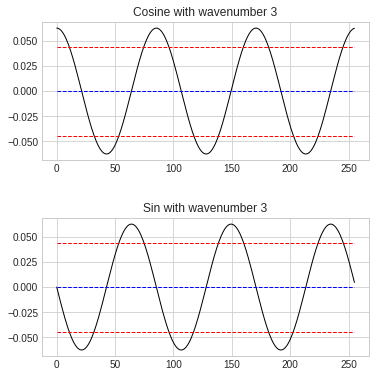

In [ ]:
## Plot of a representative Fourier basis vector
N = len(x)
k = 3 # wavenumber 3
q = (1/np.sqrt(N))*np.exp((-2j*np.pi*k/N)*np.arange(N))
print(np.linalg.norm(q))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(q.real, 'Cosine with wavenumber '+str(k), ax1)
plotveccomp(q.imag, 'Sin with wavenumber '+str(k), ax2)

In [ ]:
print(np.linalg.norm(q))

16.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


[  3 253   1 255 250   6   5 251 252   4 248   8 247   9 249   7]
[-1.87228788 -1.87228788 -1.3489817  -1.3489817   1.21513682  1.21513682
 -1.20788869 -1.20788869  1.17895974  1.17895974  0.84227288  0.84227288
 -0.72364982 -0.72364982 -0.72136048 -0.72136048]


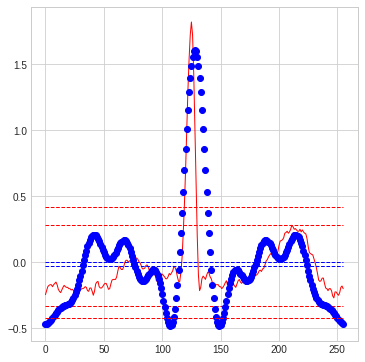

In [ ]:
F = np.zeros((N,N))
xf = np.zeros(N)
for k in np.arange(N):
  F[k, :] = (1/np.sqrt(N))*np.exp((-2j*np.pi*k/N)*np.arange(N)).reshape(1, -1)
  F[k, :] = F[k,:]/np.linalg.norm(F[k, :]) 
  xf[k] = np.dot(F[k,:].flatten(), x)
topindices = np.argsort(-np.abs(xf))[0:16]
print(topindices)
print(xf[topindices])
ecg_reconstructed = np.dot(xf[topindices].reshape(1,-1), F[topindices,:]).flatten()
fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
plotveccomp(ecg, '', ax, 1, 'red', '')
plotveccomp(ecg_reconstructed, '', ax, 0, 'blue', 'o')